In [1]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print('python version: {}'.format(sys.version))
print('matplotlib version: {}'.format(matplotlib.__version__))
print('pandas version: {}'.format(pandas.__version__))
print('sklearn version: {}'.format(sklearn.__version__))
print('seaborn version: {}'.format(seaborn.__version__))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


python version: 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
matplotlib version: 3.0.0
pandas version: 0.23.4
sklearn version: 0.20.3
seaborn version: 0.9.0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
#load the data
games = pandas.read_csv("games.csv")

In [4]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(30841, 20)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


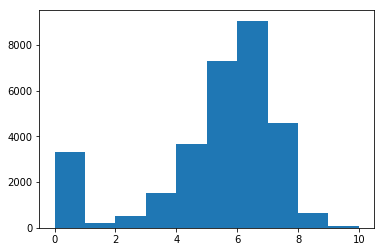

In [5]:
#make a histogram visualisation of the data
plt.hist(games["average_rating"])
plt.show()


In [6]:
#there are so many rows with 0 ratings
#lets first of such row details
print(games[games["average_rating"] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


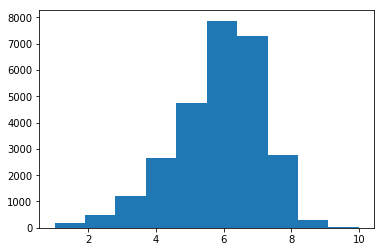

In [7]:
#looks like this game never got released
#we will have to remove such entries without user reviews, to not to affect our prediction
games = games[games["users_rated"] > 0]

games = games.dropna(axis=0)#removing rows with empty values

#again make histogram of all the average ratings
plt.hist(games["average_rating"])

plt.show()


In [8]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


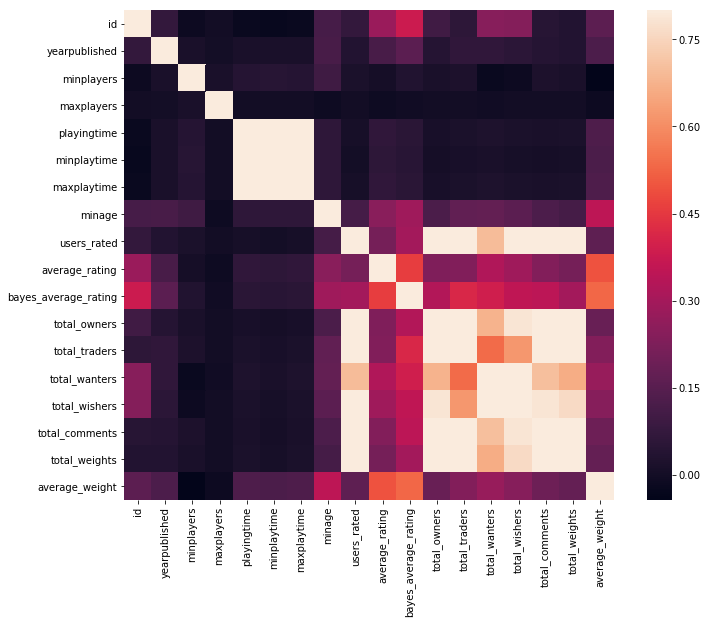

In [9]:


#we lets find the correlation in the data set

corrmat = games.corr()
fig = plt.figure(figsize =(12, 9) )
sns.heatmap(corrmat, vmax = 0.8, square = True)

plt.show()

In [10]:
#we must remove the columns which do not influence the ratings

columns = games.columns.tolist()

columns = [c for c in columns if c not in ["id", "bayes_average_rating", "average_rating", "type", "name"]]

target = "average_rating"


In [11]:
print(columns)

['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [13]:
#split the data sets to make trainign and test data set
from sklearn.model_selection import train_test_split

#generate training set
train = games.sample(frac=0.8, random_state = 1)


#put all which is not in train to test
test = games.loc[~games.index.isin(train.index)]

#print shape to see&verify data division
print(train.shape)
print(test.shape)

(22026, 20)
(5507, 20)


In [17]:
#linear regression model and random forest generator model

#import LRM

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#iniliase model class
LR = LinearRegression()

#now fit the model with training data
LR.fit(train[columns], train[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
#generate the predictions for test set
predictions = LR.predict(test[columns])

#examine error between train set and test set
mean_squared_error(predictions, test[target])

1.2300111067947403

In [19]:
#complex data so looks like linear model didnt fit properly
#actually heat map didnt show any strong signals of linear relationship

#Import the random forest model

from sklearn.ensemble import RandomForestRegressor

#initiliase model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

#fit to data
RFR.fit(train[columns], train[target])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [20]:
#now predict
predictions = RFR.predict(test[columns])

#compute the error
mean_squared_error(predictions,test[target])

0.9396966899007927

In [22]:
#error with RFR is less than LR

test[columns].iloc[0]

yearpublished      2008.0000
minplayers            1.0000
maxplayers            5.0000
playingtime         200.0000
minplaytime         100.0000
maxplaytime         200.0000
minage               12.0000
users_rated       15774.0000
total_owners      16429.0000
total_traders       205.0000
total_wanters      1343.0000
total_wishers      5149.0000
total_comments     3458.0000
total_weights      1450.0000
average_weight        3.7531
Name: 14, dtype: float64

In [27]:
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1, -1))

rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1, -1))

print(rating_LR)
print(rating_RFR)

[9.17983733]
[8.05418616]


In [28]:
test[target].iloc[0]

7.99115